**Report Of EP502**
By Subham Ghosh (V21125)


**Introduction** 
basically I am trying to find out comparision between different types of model for particular data-set. Write a small intro for each and every algorithm.


A **machine learning workflow** is the process of teaching a computer to learn and make predictions based on data. Here are the steps of a typical machine learning workflow, explained in simple words:

1. Get the data: Start with some information, like a list of compositions, and what you want the computer to learn from it. For example, you might want it to predict a specific property based on the compositions.

2. Make the data usable: The computer needs the data to be in a format it can understand. So, you convert the raw information into simpler descriptions or characteristics that the computer can learn from. These descriptions are called "descriptors" or "features."

3. Teach the computer: Next, you train the computer by using machine learning algorithms. These algorithms analyze the data and try to find patterns or relationships between the compositions and the target property. The computer learns from these patterns to make predictions.

4. Check the performance: After the computer has been trained, you evaluate how well it is performing. You can plot graphs and analyze the results to see how accurately the model predicts the target property. This step helps you understand if the computer has learned well or if there are areas for improvement.

Here we are going to use ```matminer``` which have many materials databases, including: - Materials Project - Citrine - AFLOW - Materials Data Facility (MDF) - Materials Platform for Data Science (MPDS).

In [61]:
from matminer.datasets import get_available_datasets

Ok now we have this much dataset.Now I take heusler magnetic dataset(1153 Heusler alloys with DFT-calculated magnetic and electronic properties) and try to predict its heusler or inverse_heusler by two algorithm  Decision Tree Classifier, Random Forest and KNN. 

In [10]:
from matminer.datasets import load_dataset

df = load_dataset("heusler_magnetic")

Fetching heusler_magnetic.json.gz from https://ndownloader.figshare.com/files/13354670 to /usr/local/lib/python3.10/dist-packages/matminer/datasets/heusler_magnetic.json.gz


Fetching https://ndownloader.figshare.com/files/13354670 in MB: 0.026624MB [00:00, 14.20MB/s]                 


In [11]:
df

,formula,heusler type,num_electron,struct type,latt const,tetragonality,e_form,pol fermi,mu_b,mu_b saturation
0,V2ScAl,Full Heusler,16,D022,5.4900,1.5610,0.046,0.10,0.0002,0.03
1,V2ScGa,Full Heusler,16,D022,5.4300,1.5893,-0.014,36.93,0.1775,25.88
2,V2ScIn,Full Heusler,16,D022,5.6600,1.5583,0.191,34.28,0.1624,21.32
3,V2ScSi,Full Heusler,17,D022,5.3400,1.5993,-0.122,19.59,0.6638,101.12
4,V2ScGe,Full Heusler,17,D022,5.3900,1.6104,-0.087,10.09,0.7492,110.21
...,...,...,...,...,...,...,...,...,...,...
1148,Fe2CoSb,Inverse Heusler,30,Xa,5.9920,1.0010,0.021,37.50,5.9328,1021.94
1149,Fe2NiAl,Inverse Heusler,29,Xa,5.7455,0.9972,-0.292,10.33,4.7777,937.04
1150,Fe2NiGa,Inverse Heusler,29,Xa,5.7570,1.0000,-0.183,6.86,4.8692,946.66
1151,Fe2NiIn,Inverse Heusler,29,Xa,6.0193,1.0030,0.076,23.84,5.1485,873.12


In [22]:
df['heusler type'].unique()

array(['Full Heusler', 'Half Heusler', 'Inverse Heusler'], dtype=object)

In [19]:
df.isnull().sum()

formula             0
heusler type        0
num_electron        0
struct type         0
latt const          0
tetragonality       0
e_form             72
pol fermi          72
mu_b                0
mu_b saturation    72
dtype: int64

As there is some null rows we should remove it from here..

In [20]:
df_1=df.dropna()
df_1.isnull().sum()

formula            0
heusler type       0
num_electron       0
struct type        0
latt const         0
tetragonality      0
e_form             0
pol fermi          0
mu_b               0
mu_b saturation    0
dtype: int64

In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081 entries, 0 to 1152
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   formula          1081 non-null   object 
 1   heusler type     1081 non-null   object 
 2   num_electron     1081 non-null   int64  
 3   struct type      1081 non-null   object 
 4   latt const       1081 non-null   float64
 5   tetragonality    1081 non-null   float64
 6   e_form           1081 non-null   float64
 7   pol fermi        1081 non-null   float64
 8   mu_b             1081 non-null   float64
 9   mu_b saturation  1081 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 92.9+ KB


Here our target column is heusler type and others column used for learning . And for this case we take full heusler and half heusler as heusler.

In [52]:
X = df_1[['num_electron','latt const','latt const','tetragonality','e_form','pol fermi','mu_b','mu_b saturation']]
y = df_1['heusler type']
y = y.map({'Full Heusler':1, 'Half Heusler':1, 'Inverse Heusler':0})

Now we need to break the dataset into two parts: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Decision Tree Classifier**  a decision tree classifier is an algorithm that uses a tree-like structure to make decisions based on input features and their values. It learns from data to create a sequence of decision rules, allowing it to predict the class label of new instances.To make a prediction using a decision tree, we start at the root node and follow the path that corresponds to the values of the input features. At each node, a decision is made based on the feature's value, and we proceed to the next node until we reach a leaf node, which provides the final prediction.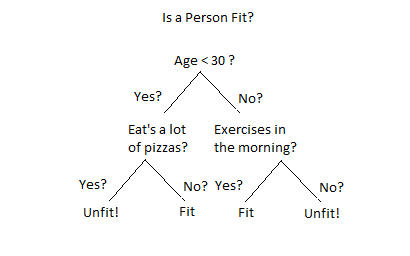

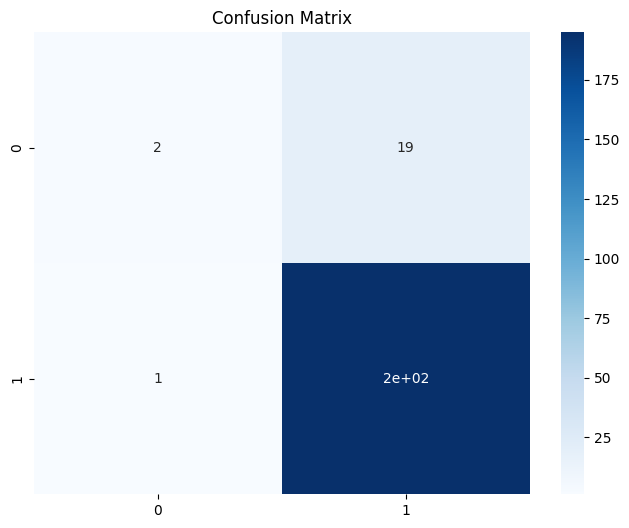

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.10      0.17        21
           1       0.91      0.99      0.95       196

    accuracy                           0.91       217
   macro avg       0.79      0.55      0.56       217
weighted avg       0.89      0.91      0.88       217



In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
# Create a classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)

**Random Forest classifier** combines multiple decision trees to make predictions. It's called a "forest" because it consists of a collection of decision trees.In simple terms, a Random Forest Classifier is like a group of decision-making trees working together. Each tree votes on the prediction, and the final prediction is based on majority voting. This ensemble approach helps to improve prediction accuracy and reliability.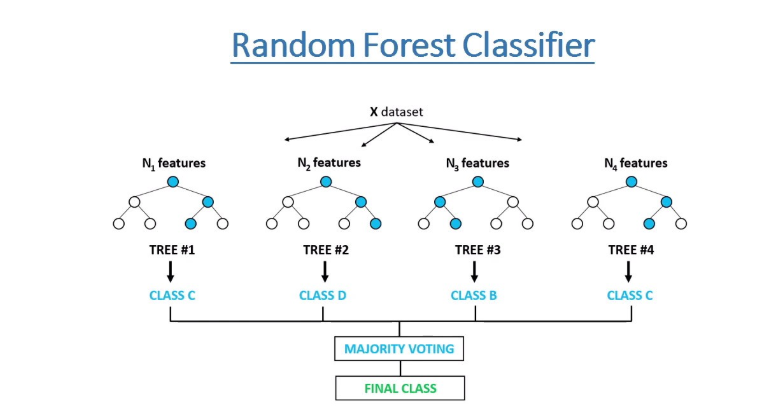

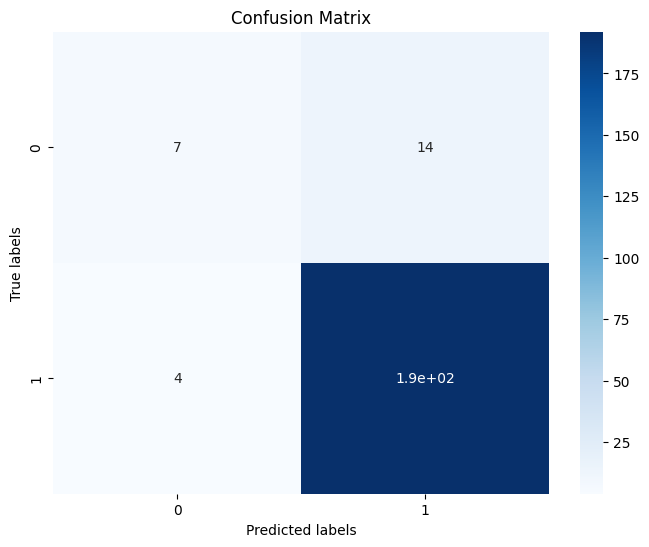

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.33      0.44        21
           1       0.93      0.98      0.96       196

    accuracy                           0.92       217
   macro avg       0.78      0.66      0.70       217
weighted avg       0.90      0.92      0.91       217



In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Create a classification report
class_report_1 = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report_1)


**K-Nearest Neighbor Classifier** is a non-parametric algorithm, which means it doesn't make any assumptions about the underlying data distribution. It's simple to understand and implement. However, it can be computationally expensive for large datasets because it requires calculating distances for each new instance.

In simple terms, a KNN Classifier finds the k closest neighbors to a new instance and assigns it the class label based on majority voting. It's like asking your neighbors for advice and following the decision that most of them agree on. KNN is flexible, but it can take more time for larger datasets.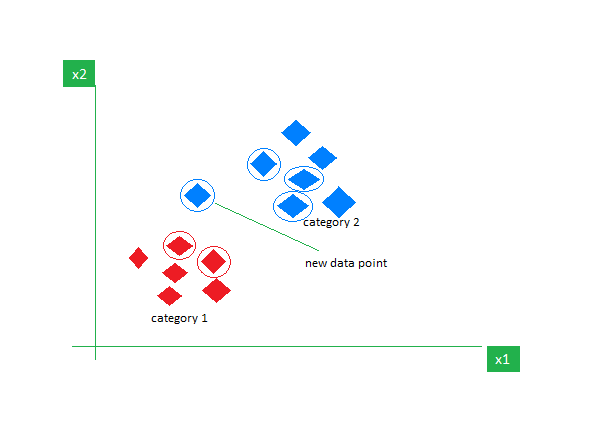

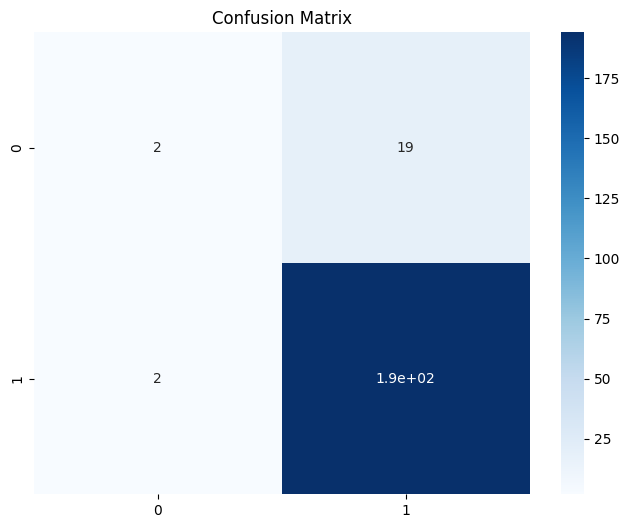

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.10      0.16        21
           1       0.91      0.99      0.95       196

    accuracy                           0.90       217
   macro avg       0.71      0.54      0.55       217
weighted avg       0.87      0.90      0.87       217



In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate a KNeighborsClassifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict test set labels
y_pred = knn.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Create a classification report
class_report_2 = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report_2)

When comparing the classification reports of the Decision Tree, Random Forest, and KNN algorithms for your project, here's a simple comparison:

1. Precision: Precision measures the accuracy of positive predictions. Random Forest achieved the highest precision for both classes (0 and 1), followed by KNN and then Decision Tree. This indicates that Random Forest had the fewest false positives, making it more precise in predicting both classes.

2. Recall: Recall measures the ability of the model to identify positive instances correctly. Random Forest had the highest recall for both classes, indicating that it identified a higher proportion of true positives. KNN had the second-highest recall, while Decision Tree had the lowest recall, especially for Class 0.

3. F1-score: The F1-score is the harmonic mean of precision and recall. Random Forest had the highest F1-score for both classes, indicating a better balance between precision and recall. KNN had the second-highest F1-scores, while Decision Tree had the lowest F1-scores, particularly for Class 0.

4. Accuracy: Random Forest had the highest overall accuracy, followed by KNN and then Decision Tree. This means that Random Forest made the most accurate predictions overall, while Decision Tree had the lowest accuracy.

Considering these comparisons, Random Forest performed the best among the three algorithms in terms of precision, recall, F1-score, and accuracy. It achieved a good balance between correctly identifying positive instances and minimizing false positives. KNN also performed relatively well, while the Decision Tree algorithm had lower performance, particularly in predicting instances of Class 0.